# Flower

**color,size of petal,shape of petal overfitting overgenerslized**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix 

In [2]:
#  BMI Calculator
np.random.seed(50)
height = np.random.randint(140,200,200)
weight = np.random.randint(40,120,200)
bmi = weight/((height/100)**2)

def category(bmi):
    bmi=float(bmi)
    if bmi <= 19:
        return "underweight"
    elif bmi<=25 and bmi > 19:
        return "normal"
    else:
        return "over weight"

category=np.array([category(b) for b in bmi])


BMI=pd.DataFrame({"Height":height,"Weight":weight,"BMI":bmi,"Category":category})
BMI

,Height,Weight,BMI,Category
0,188,104,29.425079,over weight
1,172,118,39.886425,over weight
2,151,92,40.349107,over weight
3,185,66,19.284149,normal
4,173,85,28.400548,over weight
...,...,...,...,...
195,154,87,36.684095,over weight
196,196,99,25.770512,over weight
197,142,70,34.715334,over weight
198,180,103,31.790123,over weight


In [3]:
L_C = LabelEncoder()
BMI["Category"] = L_C.fit_transform(BMI["Category"])
BMI

,Height,Weight,BMI,Category
0,188,104,29.425079,1
1,172,118,39.886425,1
2,151,92,40.349107,1
3,185,66,19.284149,0
4,173,85,28.400548,1
...,...,...,...,...
195,154,87,36.684095,1
196,196,99,25.770512,1
197,142,70,34.715334,1
198,180,103,31.790123,1


In [4]:
X=BMI[["Height","Weight"]]
Y=BMI["Category"]



In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [6]:
print(X_train,X_test,Y_train,Y_test)

     Height  Weight
169     146      84
97      176      94
31      182      46
12      145      59
35      146      82
..      ...     ...
106     177      76
14      171     118
92      168     106
179     198      43
102     162      73

[140 rows x 2 columns]      Height  Weight
95      176      73
15      198      43
30      161      75
158     198      90
128     144      47
115     198     106
69      147      43
170     192      90
174     197      56
45      142      82
66      167      41
182     198      58
165     162      48
78      198      85
186     192     110
177     199      75
56      169      99
152     155      44
82      149      83
68      153      75
124     195      50
16      147      68
148     182      73
93      146      45
65      164      90
60      170      95
84      192     108
67      186      87
125     196      77
132     157      50
9       146      62
18      144      44
55      169      80
75      140      61
150     146      66
104     159     

In [7]:
model= KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

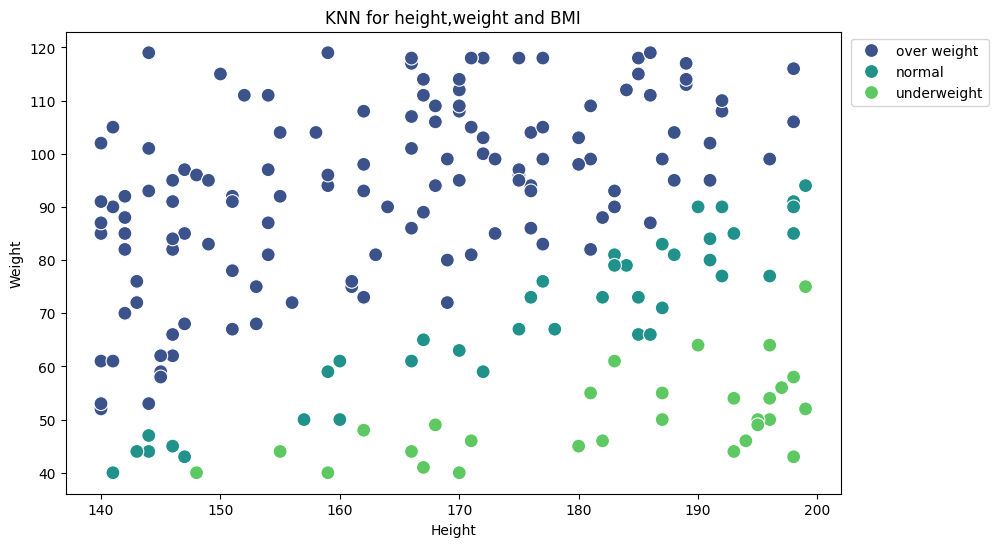

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s=100)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("KNN for height,weight and BMI")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()

Enter your height in cm: 180
Enter your Weight in kg: 56


C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Distance = [[1.41421356 5.83095189 8.54400375 9.21954446]]


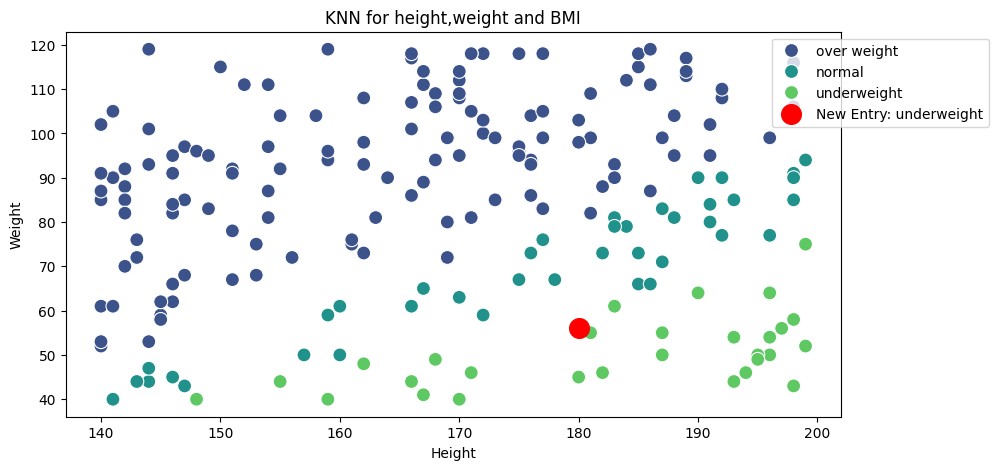

Height=180.0 Weight =56.0 | Predicted Category = underweight


In [16]:
def predictBMI(data,model,L_C):
    p=model.predict(data)
    P_C=L_C.inverse_transform(p)[0]
    return P_C
   


user_H=float(input("Enter your height in cm:"))
user_W=float(input("Enter your Weight in kg:"))


input_data=np.array([[user_H,user_W]])
predicted_Category = predictBMI(input_data,model,L_C)

D,I=model.kneighbors(input_data,n_neighbors=4)

print(f"Distance = {D}")

plt.figure(figsize=(10, 5))
#training data plot
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette = "viridis", s=100)
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry: {predicted_Category}')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("KNN for height,weight and BMI")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()
print(f"Height={user_H} Weight ={user_W} | Predicted Category = {predicted_Category}")